In [1]:
from src.utils_py.auxil import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
import matplotlib.animation as animation
from random import randint
from scipy.ndimage import gaussian_filter, uniform_filter
from matplotlib.colors import LinearSegmentedColormap

# Случай, когда $\theta$ = 180º

In [2]:
N_phi = 100
arr_phi = np.linspace(0, 1, N_phi, endpoint=True)

M_l = 100
arr_l = np.linspace(0.1, 7, M_l, endpoint=True)

grid = np.zeros((M_l, N_phi), dtype=int)

for i, l in enumerate(arr_l):
    for j, phi in enumerate(arr_phi):
        S = np.array([
            S_droplet_180(l, phi),
            S_doughnut_180(l, phi),
            S_worm_180(l, phi),
            S_roll_180(l, phi),
            S_perforation_180(l, phi),
            S_layer_180(l, phi)
        ])

        grid[i, j] = np.argmin(S)

plt.figure(figsize=(8, 6))
plt.title(r'$\theta$'+'={:.1f}'.format(np.rad2deg(theta)), fontsize=16)

names = np.array(['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer'])
colors = ["#ea3930", "#ffb534", "#3499e8", "#a946ff", "#32ff92", "#a9a9a9"]
color_map = matplotlib.colors.ListedColormap(colors)
im = plt.imshow(grid[::-1, :], cmap=color_map, extent=[0, 1, 0, 7], aspect="auto")

patches = [ mpatches.Patch(color=colors[i], label=names[i]) for i in range(6) ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=14)

plt.xlabel(r'$\phi$', fontsize=14)
plt.ylabel(r'$l$', fontsize=14)
plt.show()

NameError: name 'theta' is not defined

<Figure size 800x600 with 0 Axes>

In [3]:
phi = 0.5
l = 3

print(S_droplet_180(phi, l))
print(S_doughnut_180(phi, l))
print(S_worm_180(phi, l))
print(S_roll_180(phi, l))
print(S_perforation_180(phi, l))
print(S_layer_180(phi, l))

inf
inf
inf
inf
inf
inf


# Случай произвольного угла $\theta$

In [4]:
def draw_phase_diagramm(N_phi, M_l, theta, l_max=7):
    arr_phi = np.linspace(0, 1, N_phi, endpoint=True)

    arr_l = np.linspace(0.001, l_max, M_l, endpoint=True)

    grid = np.zeros((M_l, N_phi), dtype=int)

    for i, l in enumerate(arr_l):
        for j, phi in enumerate(arr_phi):
            S = np.array([
                S_droplet(l, phi, theta),
                S_doughnut(l, phi, theta),
                S_worm(l, phi, theta),
                S_roll(l, phi, theta),
                S_perforation(l, phi, theta),
                S_layer(l, phi, theta)
            ])

            grid[i, j] = np.argmin(S)

    return grid

In [5]:
def check_neighbors(i, j, grid):
    value = grid[i, j]

    # Получаем значения соседей и проверяем, находятся ли они в пределах массива
    neighbors = []
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
                neighbors.append(grid[x, y])
    # for k in range(4):
    #     x = i + (2 * k + 1) % 3 - 1
    #     y = j + (2 * k + 1) // 3 - 1
    #     if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
    #         neighbors.append(grid[x, y])

    # Проверяем совпадение значения с соседями
    return np.allclose(value, neighbors)

Processing 120


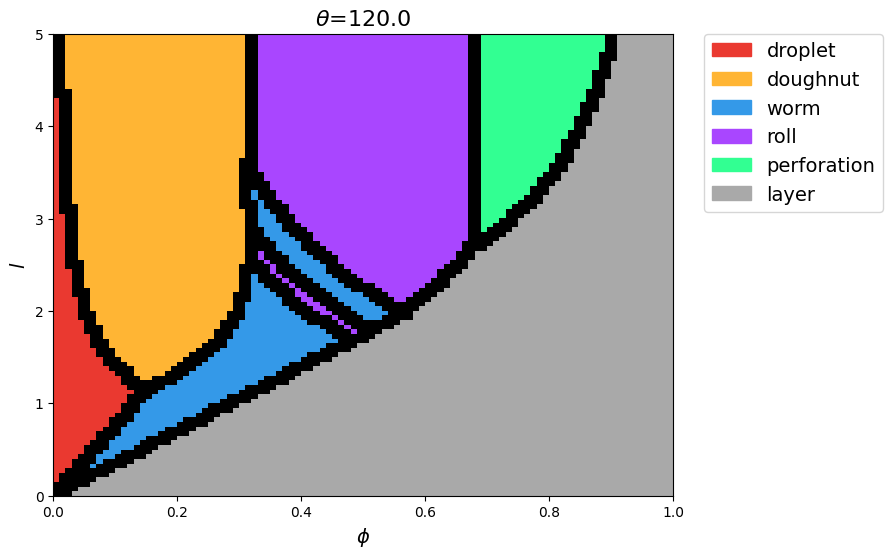

In [7]:
# for theta in range(180, 90, -10):
theta = 120
l = 5
print('Processing '+str(theta))
WIDTH, HEIGHT = 100, 100
grid = draw_phase_diagramm(WIDTH, HEIGHT, np.deg2rad(theta), l_max=l)

mask = np.ones_like(grid)

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if check_neighbors(i, j, grid):
            mask[i, j] = 0

size = 1 # параметр сглаживания, можете настроить по вашему вкусу
sigma = 1
smoothed_mask = uniform_filter(mask.astype(float), size=size)
# smoothed_mask = gaussian_filter(mask.astype(float), sigma=sigma)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_title(r'$\theta$'+'={:.1f}'.format(theta), fontsize=16)

names = np.array(['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer'])
colors = ["#ea3930", "#ffb534", "#3499e8", "#a946ff", "#32ff92", "#a9a9a9"]
color_map = matplotlib.colors.ListedColormap(colors)
ax.imshow(grid[::-1, :], cmap=color_map, extent=[0, 1, 0, l], aspect="auto")

np.save(f'phase_diagrams/{theta}_grid', grid)

smooth_name = "smooth pallete"
smooth_colors = [(0, 0, 0, 0), (0, 0, 0, 1)]  # от прозрачности до непрозрачности
n_bins = 100  # количество оттенков в градиенте
smooth_cmap = LinearSegmentedColormap.from_list(smooth_name, smooth_colors, N=n_bins)

# ax.imshow(smoothed_mask > 0, cmap='gray', alpha=smoothed_mask[::-1, :])
ax.imshow(smoothed_mask[::-1, :], cmap=smooth_cmap, extent=[0, 1, 0, l], aspect="auto", vmin=0, vmax=1)
np.save(f'phase_diagrams/{theta}_mask', smoothed_mask)

patches = [ mpatches.Patch(color=colors[i], label=names[i]) for i in range(6) ]
lgd = ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=14)

ax.set_xlabel(r'$\phi$', fontsize=14)
ax.set_ylabel(r'$l$', fontsize=14)

# fig.savefig(f'img/{theta}.png', bbox_inches='tight')
plt.show()

# Рисуем анимацию

MovieWriter imagemagick unavailable; using Pillow instead.


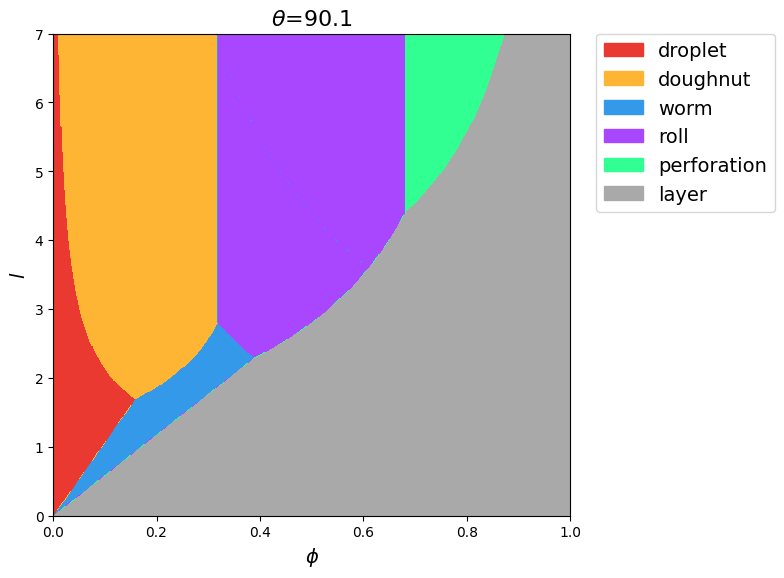

In [58]:
N = 500
M = 500
theta = np.linspace(180, 90.1, 50, endpoint=True)


# Создаем график
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

grid = draw_phase_diagramm(N, M, np.deg2rad(180), l_max=5)
names = np.array(['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer'])
colors = ["#ea3930", "#ffb534", "#3499e8", "#a946ff", "#32ff92", "#a9a9a9"]
color_map = matplotlib.colors.ListedColormap(colors)
im = ax.imshow(grid[::-1, :], cmap=color_map, extent=[0, 1, 0, 7], aspect="auto")

patches = [ mpatches.Patch(color=colors[i], label=names[i]) for i in range(6) ]
lgd = ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. , fontsize=14)

ax.set_xlabel(r'$\phi$', fontsize=14)
ax.set_ylabel(r'$l$', fontsize=14)

def update_grid(frame):
    # Здесь может быть ваш код для обновления массива grid
    # Например, изменение некоторых элементов массива
    ax.set_title(r'$\theta$'+'={:.1f}'.format(theta[frame]), fontsize=16)
    im.set_array(draw_phase_diagramm(N, M, np.deg2rad(theta[frame]), l_max=5)[::-1, :])
    return im,

# Функция для инициализации
def init():
    im.set_array(draw_phase_diagramm(N, M, np.deg2rad(180), l_max=5))
    return im,

# Создаем анимацию
ani = animation.FuncAnimation(fig, update_grid, frames=len(theta), init_func=init, blit=True, interval=500)

plt.tight_layout(rect=(0, 0, 1, 0.95))
# Сохраняем анимацию в видеофайл (формат GIF)
ani.save('img/animation.gif', writer='imagemagick', fps=len(theta)/10)

# plt.show()

---

## Объединение графиков на одном

In [56]:
plt.rcParams['font.family'] = 'Helvetica'

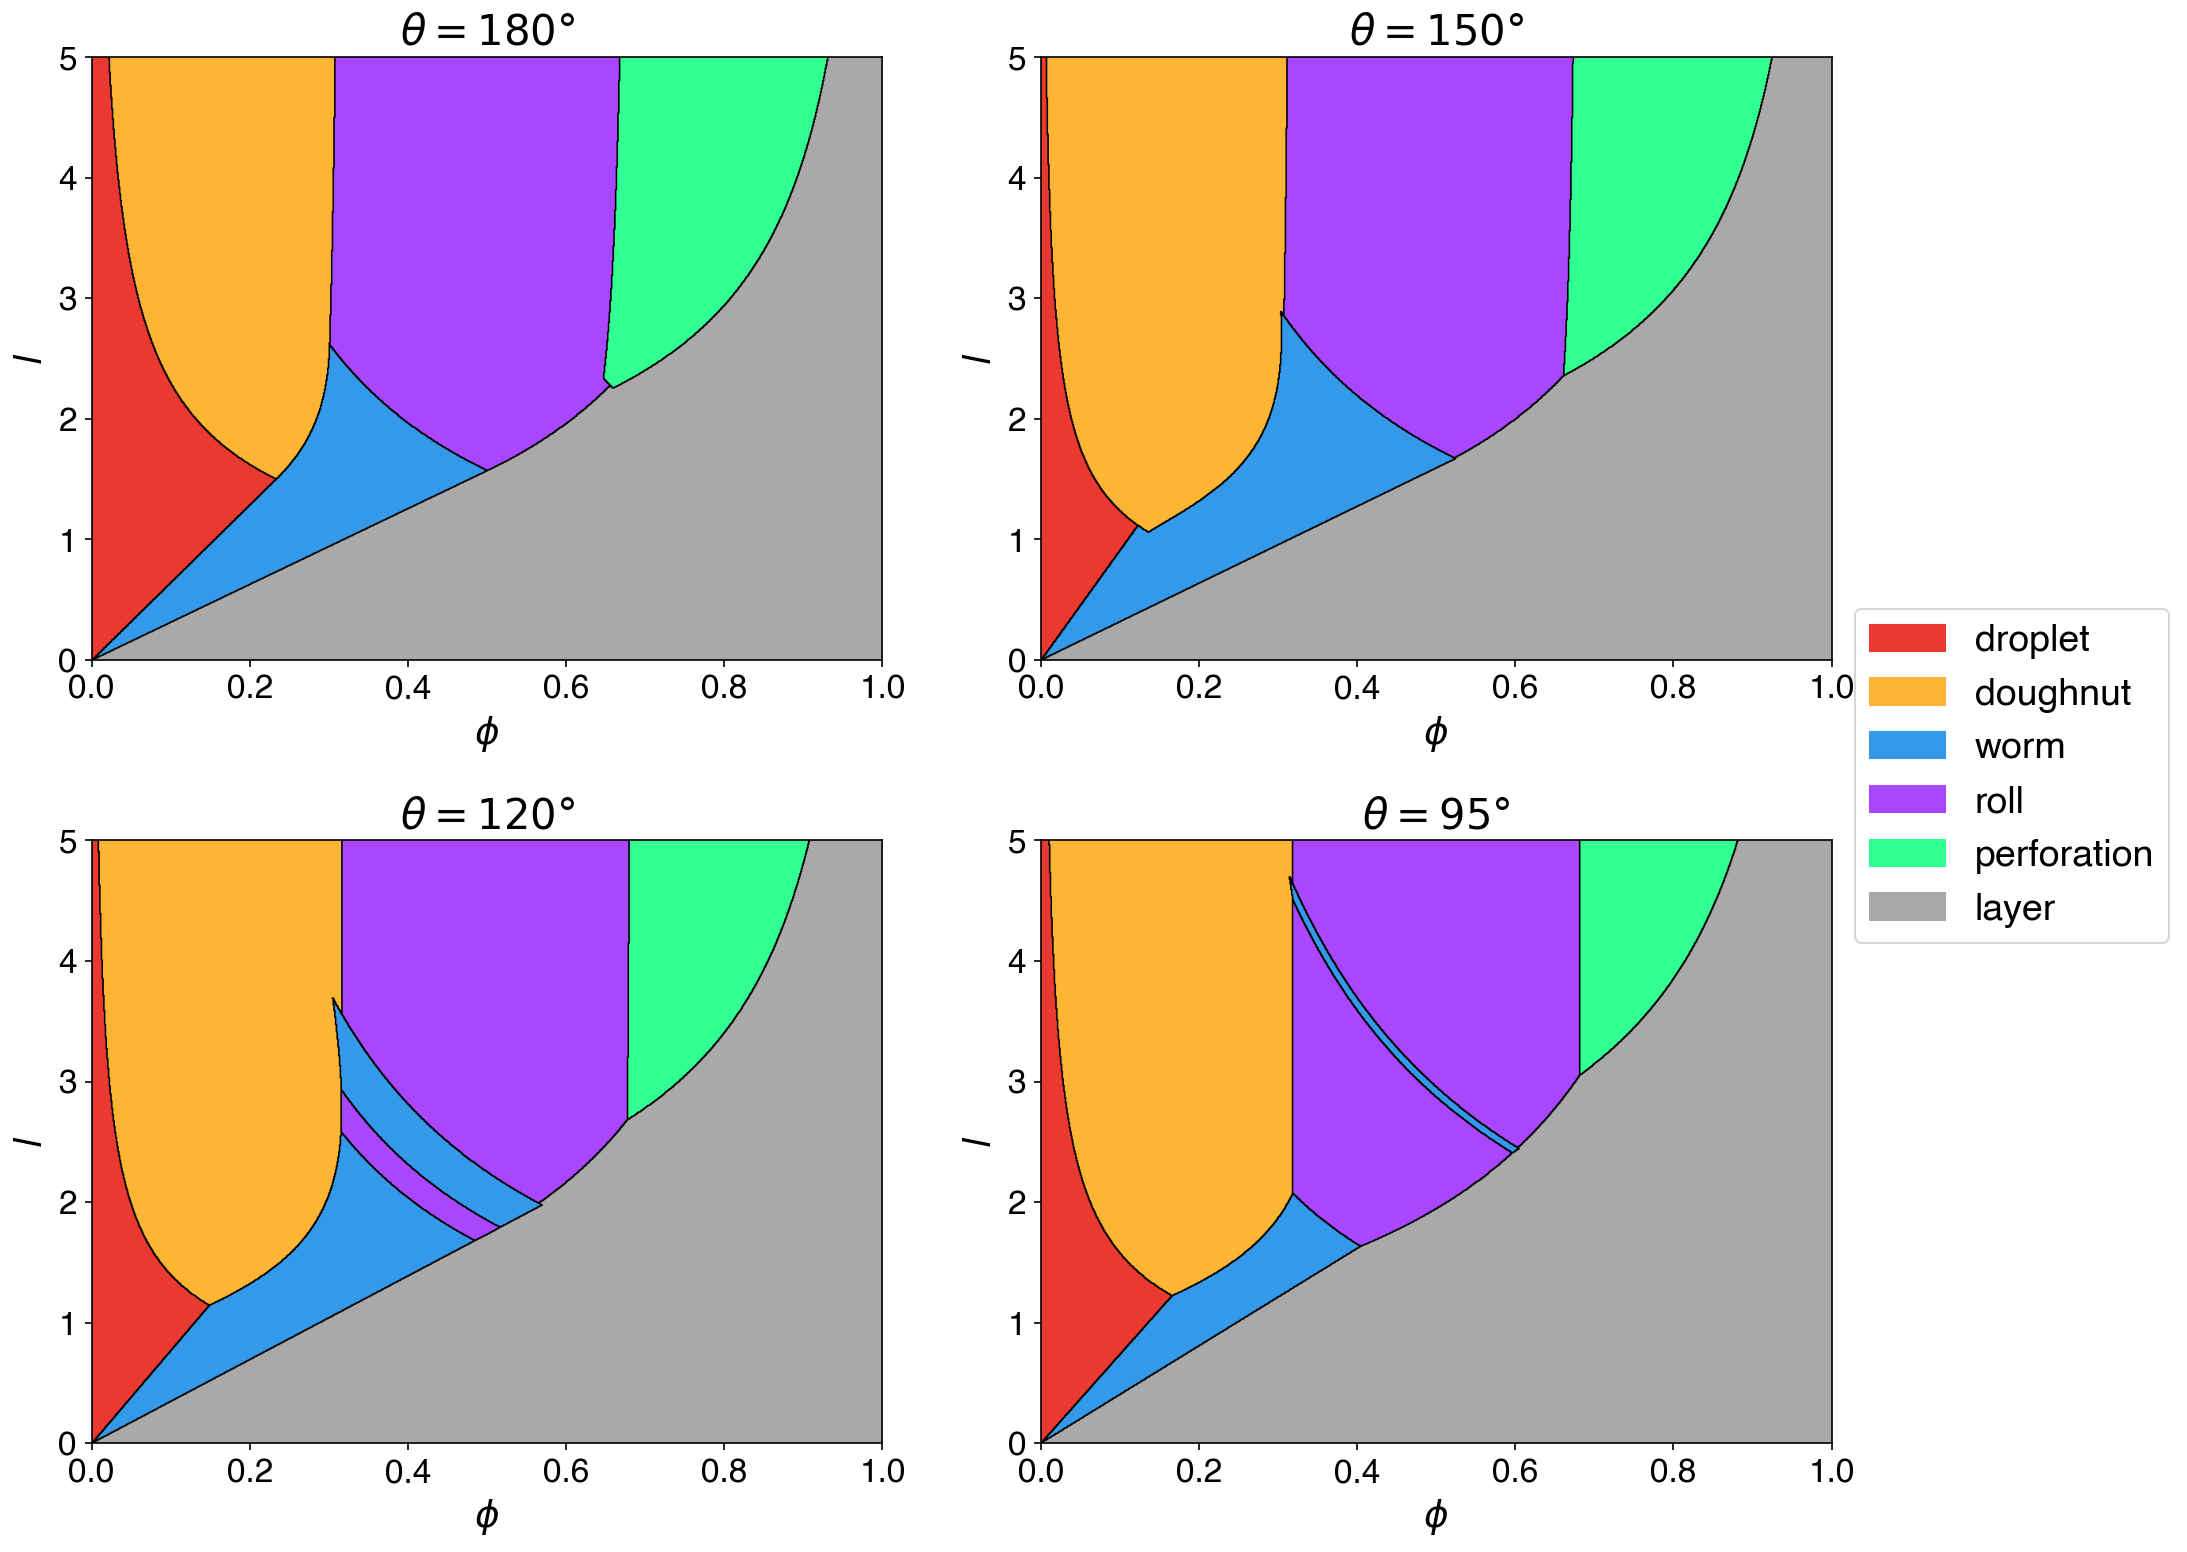

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Define angles and corresponding filenames
angles = [180, 150, 120, 95]
grid_filenames = [f'phase_diagrams/{angle}_grid.npy' for angle in angles]
mask_filenames = [f'phase_diagrams/{angle}_mask.npy' for angle in angles]

# Define phase diagram names and colors
names = np.array(['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer'])
colors = ["#ea3930", "#ffb534", "#3499e8", "#a946ff", "#32ff92", "#a9a9a9"]

# Create a custom color map
color_map = ListedColormap(colors)

# Create a smooth color map for the mask
smooth_name = "smooth_palette"
smooth_colors = [(0, 0, 0, 0), (0, 0, 0, 1)]  # from transparent to black
n_bins = 100  # number of shades in the gradient
smooth_cmap = LinearSegmentedColormap.from_list(smooth_name, smooth_colors, N=n_bins)

# Create a figure and axes for a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12), dpi=150)

# Plot each phase diagram
for ax, angle, grid_filename, mask_filename in zip(axs.ravel(), angles, grid_filenames, mask_filenames):
    # Load the grid and mask data
    grid = np.load(grid_filename)
    smooth_mask = np.load(mask_filename)

    # Plot the phase diagram
    ax.imshow(grid[::-1, :], cmap=color_map, extent=[0, 1, 0, 5], aspect='auto')
    ax.imshow(smooth_mask[::-1, :], cmap=smooth_cmap, extent=[0, 1, 0, 5], aspect='auto', vmin=0, vmax=1)
    ax.set_title(f'$\\theta={angle}\degree$', fontsize=20)
    ax.set_xlabel(r'$\phi$', fontsize=18)
    ax.set_ylabel(r'$l$', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=16)

# Create a single legend for all subplots
patches = [mpatches.Patch(color=colors[i], label=names[i]) for i in range(len(names))]
fig.legend(handles=patches, loc='center right', fontsize=18)

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85, hspace=0.3)

# Save the figure or show
plt.show()
